Epoch 1/10
782/782 [==============================] - 25s 30ms/step - loss: 10.0420 - accuracy: 0.1035 - val_loss: 2.7053 - val_accuracy: 0.1064
Epoch 2/10
782/782 [==============================] - 24s 30ms/step - loss: 2.4624 - accuracy: 0.1032 - val_loss: 2.3618 - val_accuracy: 0.1064
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 2.3445 - accuracy: 0.1046 - val_loss: 2.3419 - val_accuracy: 0.1090
Epoch 4/10
782/782 [==============================] - 19s 25ms/step - loss: 2.3324 - accuracy: 0.1048 - val_loss: 2.3314 - val_accuracy: 0.1064
Epoch 5/10
782/782 [==============================] - 16s 21ms/step - loss: 2.3249 - accuracy: 0.1026 - val_loss: 2.3186 - val_accuracy: 0.1090
Epoch 6/10
782/782 [==============================] - 17s 21ms/step - loss: 2.3207 - accuracy: 0.1024 - val_loss: 2.3263 - val_accuracy: 0.1064
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 2.3164 - accuracy: 0.1066 - val_loss: 2.3110 - val_accuracy

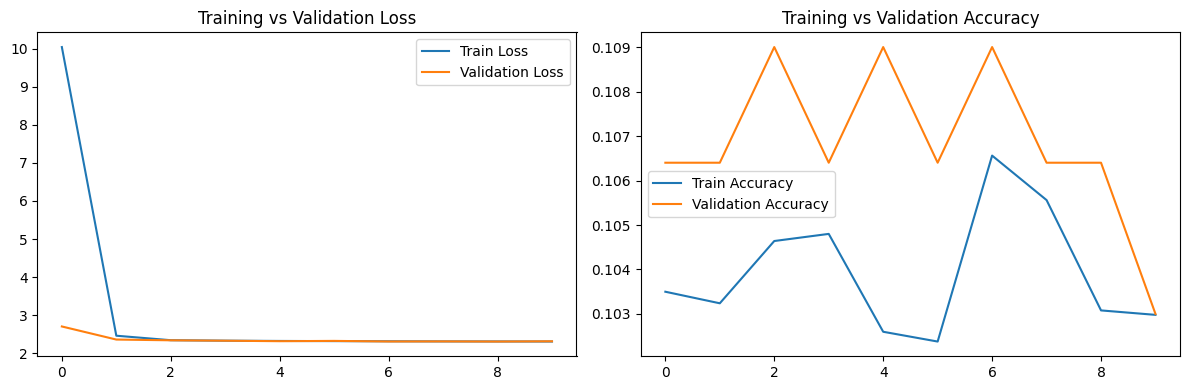

313/313 [==============================] - 1s 3ms/step
F1 Score: 0.0183


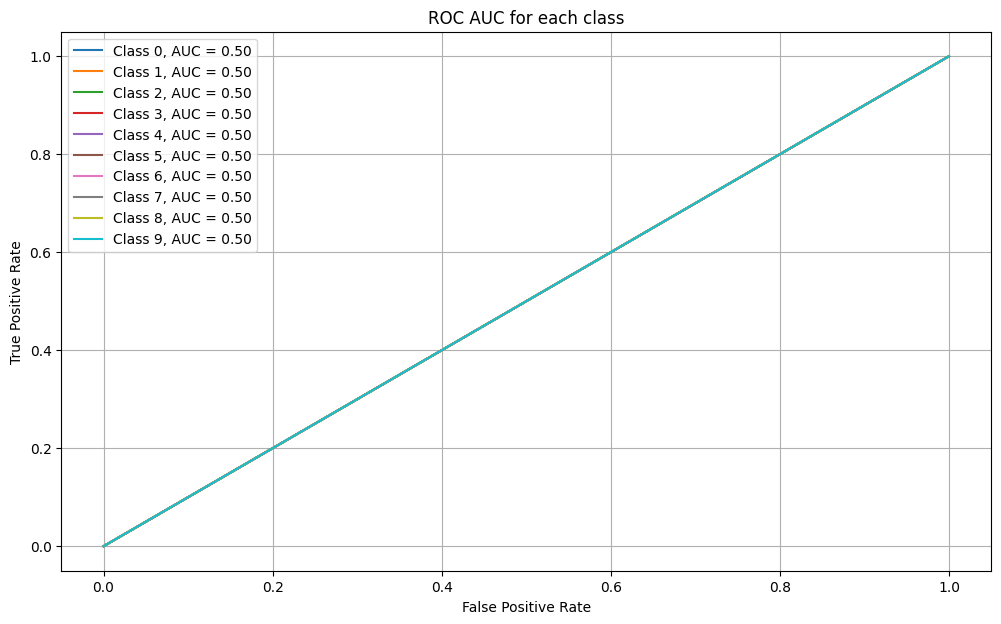

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]



# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)), # Adding a 2D convolution layer
    MaxPooling2D((2, 2)),  # Adding a max pooling layer
    BatchNormalization(),  # Batch Normalization layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Another 2D convolution layer
    MaxPooling2D((2, 2)),  # Another max pooling layer
    Flatten(),  # Flatten the output from conv layers before passing to dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularized dense layer
    Dropout(0.1),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.1)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()







Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 0.4481 - accuracy: 0.9329 - val_loss: 0.3055 - val_accuracy: 0.9528
Epoch 2/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2590 - accuracy: 0.9612 - val_loss: 0.2395 - val_accuracy: 0.9645
Epoch 3/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2377 - accuracy: 0.9636 - val_loss: 0.2512 - val_accuracy: 0.9635
Epoch 4/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2336 - accuracy: 0.9653 - val_loss: 0.2013 - val_accuracy: 0.9777
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2277 - accuracy: 0.9666 - val_loss: 0.2268 - val_accuracy: 0.9706
Epoch 6/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2234 - accuracy: 0.9672 - val_loss: 0.2629 - val_accuracy: 0.9619
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2305 - accuracy: 0.9669 - val_loss: 0.2008 - val_accuracy:

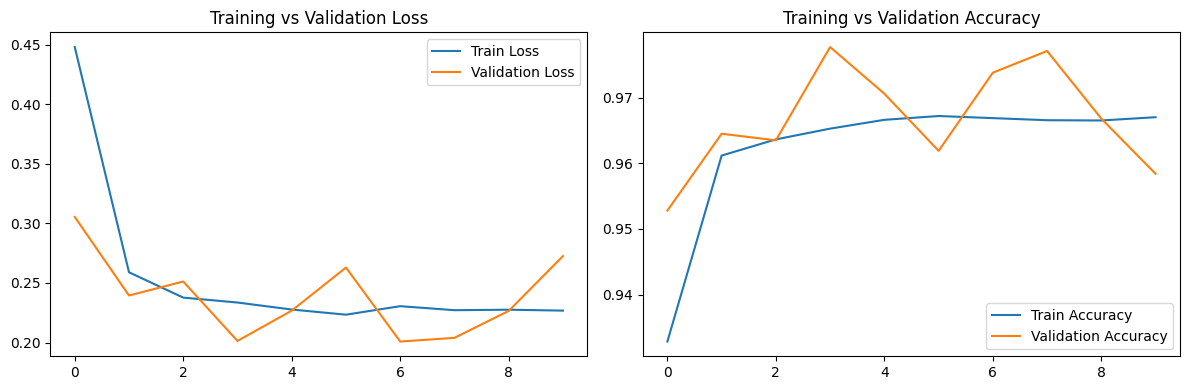

313/313 [==============================] - 1s 4ms/step
F1 Score: 0.9583


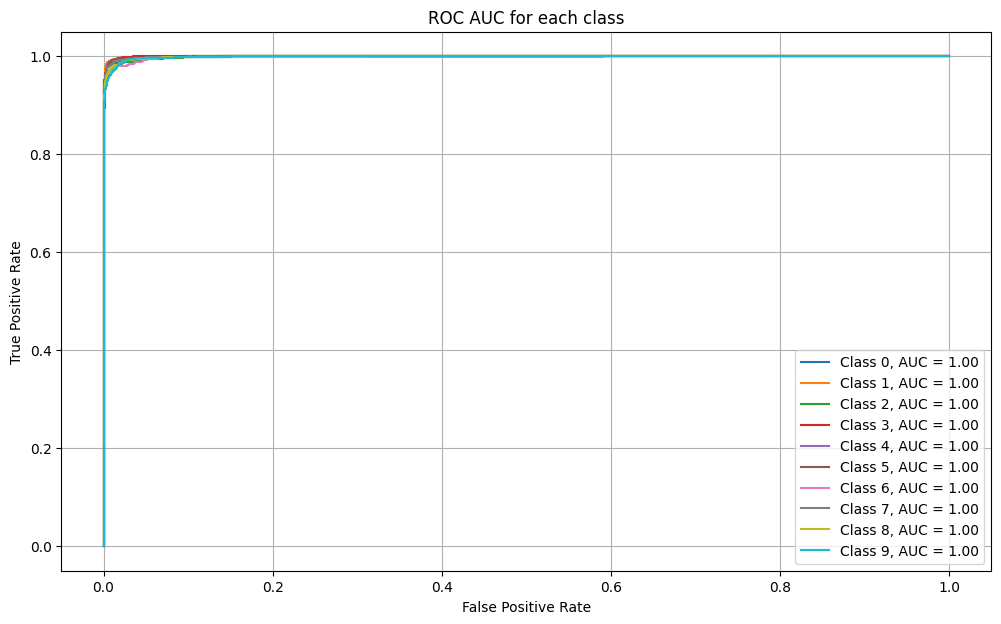

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]



# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)), # Adding a 2D convolution layer
    MaxPooling2D((2, 2)),  # Adding a max pooling layer
    BatchNormalization(),  # Batch Normalization layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Another 2D convolution layer
    MaxPooling2D((2, 2)),  # Another max pooling layer
    Flatten(),  # Flatten the output from conv layers before passing to dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularized dense layer
    Dropout(0.1),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.01)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()







Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 0.3280 - accuracy: 0.9538 - val_loss: 0.1998 - val_accuracy: 0.9754
Epoch 2/10
782/782 [==============================] - 18s 24ms/step - loss: 0.1521 - accuracy: 0.9813 - val_loss: 0.1246 - val_accuracy: 0.9856
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1116 - accuracy: 0.9855 - val_loss: 0.1077 - val_accuracy: 0.9856
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0964 - accuracy: 0.9867 - val_loss: 0.0945 - val_accuracy: 0.9883
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0899 - accuracy: 0.9872 - val_loss: 0.0862 - val_accuracy: 0.9906
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.0867 - accuracy: 0.9882 - val_loss: 0.0823 - val_accuracy: 0.9907
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0812 - accuracy: 0.9888 - val_loss: 0.0853 - val_accuracy:

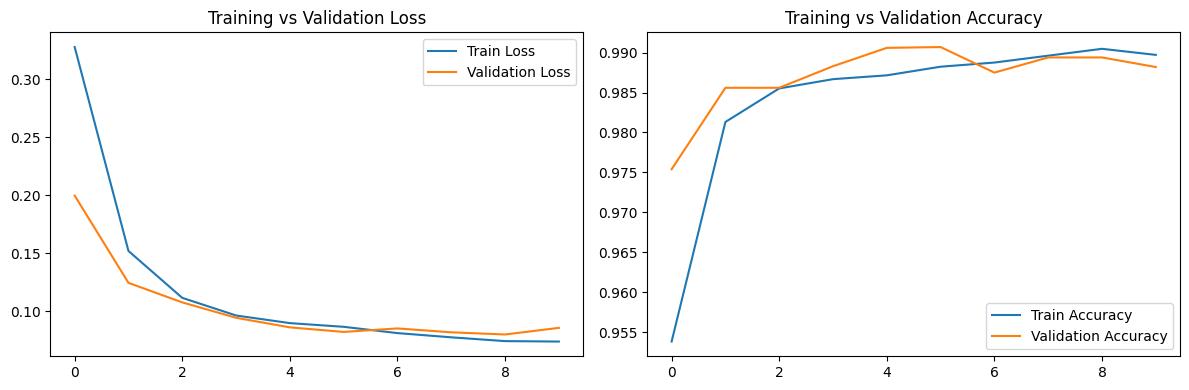

313/313 [==============================] - 1s 4ms/step
F1 Score: 0.9894


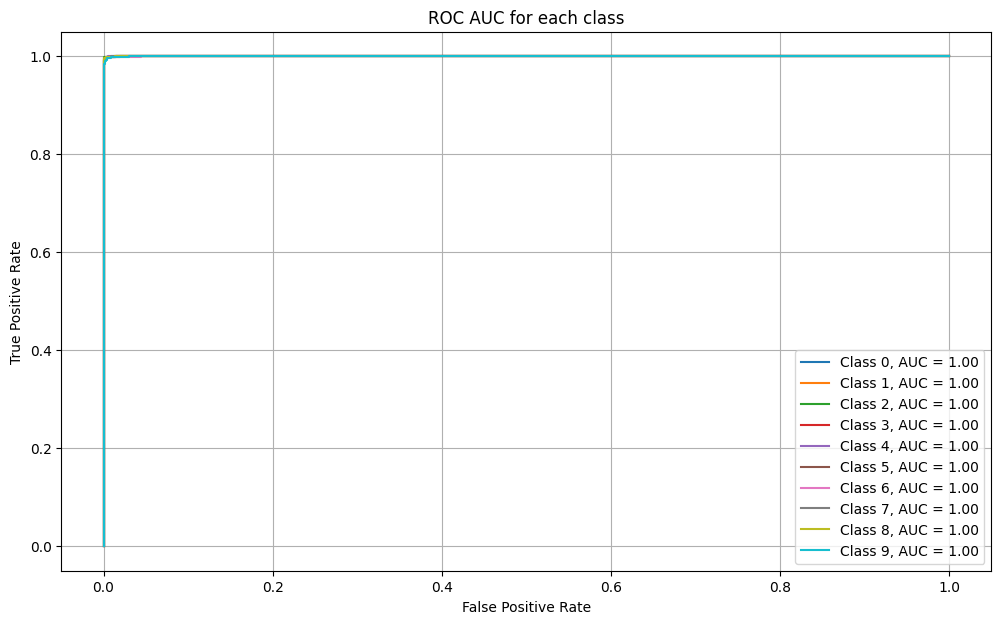

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]



# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)), # Adding a 2D convolution layer
    MaxPooling2D((2, 2)),  # Adding a max pooling layer
    BatchNormalization(),  # Batch Normalization layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Another 2D convolution layer
    MaxPooling2D((2, 2)),  # Another max pooling layer
    Flatten(),  # Flatten the output from conv layers before passing to dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularized dense layer
    Dropout(0.1),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()







Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 0.5949 - accuracy: 0.9024 - val_loss: 0.3421 - val_accuracy: 0.9737
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3275 - accuracy: 0.9718 - val_loss: 0.2852 - val_accuracy: 0.9821
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2754 - accuracy: 0.9807 - val_loss: 0.2515 - val_accuracy: 0.9844
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2422 - accuracy: 0.9849 - val_loss: 0.2273 - val_accuracy: 0.9870
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2147 - accuracy: 0.9875 - val_loss: 0.2071 - val_accuracy: 0.9868
Epoch 6/10
782/782 [==============================] - 18s 24ms/step - loss: 0.1926 - accuracy: 0.9892 - val_loss: 0.1867 - val_accuracy: 0.9889
Epoch 7/10
782/782 [==============================] - 18s 24ms/step - loss: 0.1733 - accuracy: 0.9900 - val_loss: 0.1725 - val_accuracy:

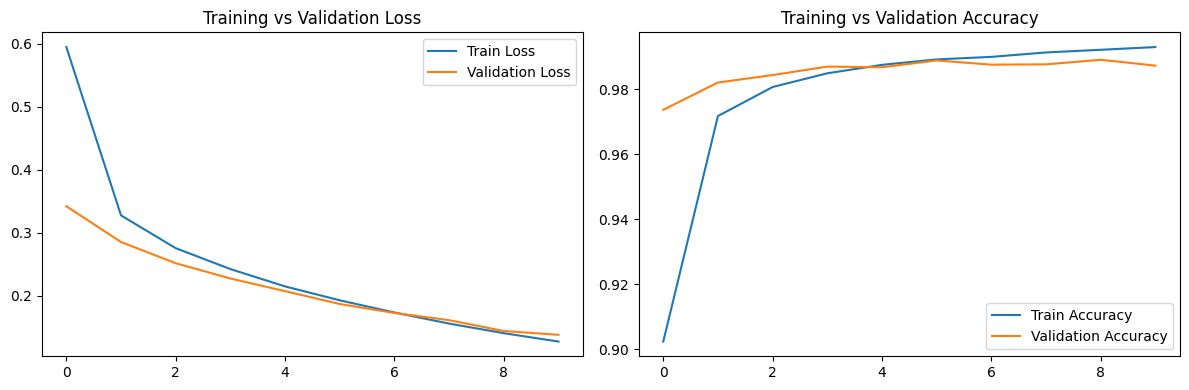

313/313 [==============================] - 1s 3ms/step
F1 Score: 0.9892


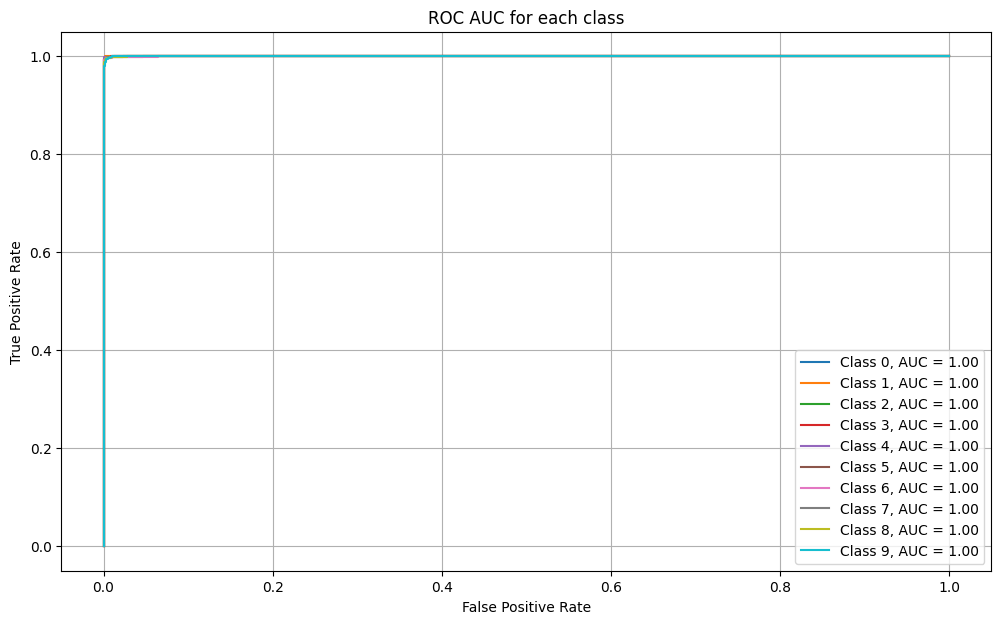

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-process the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# Split data
val_images = train_images[50000:]
val_labels_onehot = train_labels_onehot[50000:]
train_images = train_images[:50000]
train_labels_onehot = train_labels_onehot[:50000]



# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)), # Adding a 2D convolution layer
    MaxPooling2D((2, 2)),  # Adding a max pooling layer
    BatchNormalization(),  # Batch Normalization layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Another 2D convolution layer
    MaxPooling2D((2, 2)),  # Another max pooling layer
    Flatten(),  # Flatten the output from conv layers before passing to dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularized dense layer
    Dropout(0.1),  # Dropout layer
    Dense(10, activation='softmax')  # Output layer
])

# Instantiate an Adam optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=64,
                    validation_data=(val_images, val_labels_onehot), verbose=1)

# Plotting Training vs Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plotting Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

# Compute F1 score
f1 = f1_score(test_labels, y_pred_class, average='macro')
print(f"F1 Score: {f1:.4f}")

# Compute ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

# Binarize the test labels for AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot AUC for each class
plt.figure(figsize=(12, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

plt.title('ROC AUC for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()





